# Test-Train Split with Linear Regression exercise

Using the housing prices dataset, perform a train-test split, and fit a linear regression.

1. Fit a linear regression using a 15% test-train split.
1. Calculate the R-squared value for the test split on this.
1. Write a loop to try fitting different test-train split sizes. What happens to the quality of the fit as the test set increases in size?
1. Try shuffling the data somehow (consider creating a mask of random indices, google is your friend.). Does the fit change after shuffling?

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
from numpy import random

data_df = pd.read_csv('data/housing_prices.csv')
data_df.head()
X = data_df[['square_feet', 'num_rooms']]
y = data_df['price'].values

# changes mean to 0 & std deviation to one via...
# scaler object is the # of standard deviations off mean
X = StandardScaler().fit_transform(X)
X

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

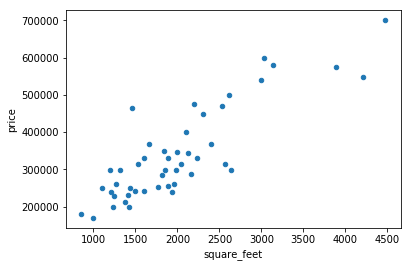

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
data_df.plot(kind='scatter', x='square_feet', y='price')

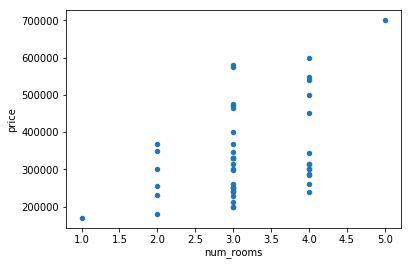

In [36]:
data_df.plot(kind='scatter', x='num_rooms', y='price')

In [48]:
data_df.describe()

,square_feet,num_rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .15)

In [25]:
lin_reg_model = LinearRegression(normalize=False)
lin_reg_model.fit(X_train, y_train)
y_hat = lin_reg_model.predict(X_test)
print(r2_score(y_hat, y_test))

0.705818924967062


In [30]:
for i in [.5, .1, .15, .2, .25, .3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    lr = LinearRegression(normalize=False)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('test split={}, r squared={}'.format(i, r2_score(y_test, y_pred)))


test split=0.5, r squared=0.7236418633389536
test split=0.1, r squared=0.5984546648471586
test split=0.15, r squared=0.8263088472392877
test split=0.2, r squared=0.7845683969664646
test split=0.25, r squared=0.5686595667555578
test split=0.3, r squared=0.7358389226380508


In [31]:
# 2nd run, note skew for 0.1
for i in [.5, .1, .15, .2, .25, .3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    lr = LinearRegression(normalize=False)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('test split={}, r squared={}'.format(i, r2_score(y_test, y_pred)))



test split=0.5, r squared=0.7085253861596104
test split=0.1, r squared=0.2798029114051127
test split=0.15, r squared=0.7513914015372634
test split=0.2, r squared=0.46055276567091885
test split=0.25, r squared=0.772079733910916
test split=0.3, r squared=0.7183881219077297


In [39]:
#Investigate X - only 46 records!!
mask_temp = np.arange(len(X))   
random.shuffle(mask_temp)
print(mask_temp)

[25  8  3 27 33 39 28 23  5 16 37 24  7 22  4 21 20 36 10 13 15  0 46 41
 19 31 40  2  6 42 30 11 43 26 35 45 38  9  1 32 29 44 18 17 14 34 12]


In [45]:
def make_shuffle(X, y):
    # you'll need to select a mask 
    mask_temp = np.arange(len(X))
    random.shuffle(mask_temp)
    X = X[mask_temp]
    y = y[mask_temp]
    
    return X, y
    
    

In [47]:
for s in range(10):
    X_sh, y_sh = make_shuffle(X, y)
    print('shuffe:{}'.format(s))
    for i in [.5, .1, .15, .2, .25, .3]:
        X_train, X_test, y_train, y_test = train_test_split(X_sh, y_sh, test_size=i)
        lr = LinearRegression(normalize=True)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        print('test split={}, r squared={}'.format(i, r2_score(y_test, y_pred)))

shuffe:0
test split=0.5, r squared=0.8307764317667086
test split=0.1, r squared=0.6829864295580423
test split=0.15, r squared=0.21143984962899887
test split=0.2, r squared=0.5919689248091033
test split=0.25, r squared=-0.19883452039997218
test split=0.3, r squared=0.6020271537115394
shuffe:1
test split=0.5, r squared=0.733746855918511
test split=0.1, r squared=-0.23980943325951687
test split=0.15, r squared=0.7723045166034557
test split=0.2, r squared=0.20144588264219299
test split=0.25, r squared=0.5822834433626898
test split=0.3, r squared=0.4463423417514266
shuffe:2
test split=0.5, r squared=0.6879692893298006
test split=0.1, r squared=0.6103523549347983
test split=0.15, r squared=0.6952623333802135
test split=0.2, r squared=0.6608112434521485
test split=0.25, r squared=0.573583845491103
test split=0.3, r squared=0.8326362539817992
shuffe:3
test split=0.5, r squared=0.6796947929065253
test split=0.1, r squared=0.24698123203859135
test split=0.15, r squared=0.6047645530688662
test sp

ValueError: x and y must be the same size

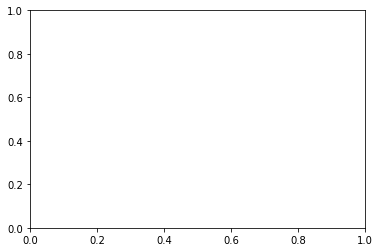

In [51]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
         
plt.show()